In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
# root = '/Genomics/pritykinlab/zzhao/metabolic_analysis/metabolic_analysis/data/th_data'
# # filename = f'{root}/GSE162300_DFMO_RNA_est_counts.csv'
# filename = f'{root}/GSE162300_DFMO_RNA_TPMs.csv'

# expression_data = pd.read_csv(filename)
# expression_data.to_csv(f'{root}/GSE162300_DFMO_RNA_TPMs.tsv', sep='\t', index=False)

In [3]:
root='/Genomics/pritykinlab/zzhao/metabolic_analysis'
filename = f'{root}/metabolic_analysis/data/th_data/GSE162300_DFMO_RNA_TPMs.tsv'
reaction_meta_file = f'{root}/Compass/compass/Resources/Recon2_export/rxn_md.csv'
reaction_output_file = f'{root}/metabolic_analysis/compass_results/reactions.tsv'

In [4]:
reaction_metadata = pd.read_csv(reaction_meta_file, index_col = 0)
reaction_penalties = pd.read_csv(reaction_output_file, sep='\t', index_col=0)
reaction_metadata

,rxn_name_long,subsystem,ind_in_original_recon,rxn_EC_number,genes_associated_with_rxn,rxn_formula,rxn_confidence
rxn_code_nodirection,,,,,,,
10FTHF5GLUtl,"5-glutamyl-10FTHF transport, lysosomal","Transport, lysosomal",1,NaN,NaN,1.00 * 10-formyltetrahydrofolate-[Glu](5) [c] ...,2.0
10FTHF5GLUtm,"5-glutamyl-10FTHF transport, mitochondrial","Transport, mitochondrial",2,NaN,NaN,1.00 * 10-formyltetrahydrofolate-[Glu](5) [m] ...,2.0
10FTHF6GLUtl,"6-glutamyl-10FTHF transport, lysosomal","Transport, lysosomal",3,NaN,NaN,1.00 * 10-formyltetrahydrofolate-[Glu](6) [c] ...,2.0
10FTHF6GLUtm,"6-glutamyl-10FTHF transport, mitochondrial","Transport, mitochondrial",4,NaN,NaN,1.00 * 10-formyltetrahydrofolate-[Glu](6) [m] ...,2.0
10FTHF7GLUtl,"7-glutamyl-10FTHF transport, lysosomal","Transport, lysosomal",5,NaN,NaN,1.00 * 10-formyltetrahydrofolate-[Glu](7) [c] ...,2.0
...,...,...,...,...,...,...,...
MAL_Lte,Transport of L-malate,"Transport, extracellular",7436,NaN,NaN,1.00 * (S)-malate(2-) [e] --> 1.00 * (S)-malat...,NaN
OROTGLUt,OROTGLUt,"Transport, extracellular",7437,NaN,SLC22A7,1.00 * L-glutamate(1-) [c] + 1.00 * Orotate [e...,NaN
PNTOte,Transport of (R)-Pantothenate,"Transport, extracellular",7438,NaN,NaN,1.00 * (R)-Pantothenate [e] --> 1.00 * (R)-Pan...,NaN


In [5]:
reaction_metadata.loc[['r0281']]

,rxn_name_long,subsystem,ind_in_original_recon,rxn_EC_number,genes_associated_with_rxn,rxn_formula,rxn_confidence
rxn_code_nodirection,,,,,,,
r0281,Putrescine:oxygen oxidoreductase (deaminating)...,Methionine and cysteine metabolism,3849,1.4.3.6,AOC1,1.00 * Water [e] + 1.00 * O2 [e] + 1.00 * Putr...,0.0


In [6]:
#This function is repeated here for clarity
def get_reaction_consistencies(compass_reaction_penalties, min_range=1e-3):
    """
        Converts the raw penalties outputs of compass into scores per reactions where higher numbers indicate more activity
    """
    df = -np.log(compass_reaction_penalties + 1)
    df = df[df.max(axis=1) - df.min(axis=1) >= min_range]
    df = df - df.min().min()
    return df

In [7]:
reaction_consistencies = get_reaction_consistencies(reaction_penalties)

In [8]:
reaction_consistencies.keys()

Index(['Th17p_Vehicle_WT1_run1', 'Th17p_Vehicle_WT1_run2',
       'Th17n_Vehicle_WT1_run1', 'Th17n_Vehicle_WT1_run2',
       'iTreg_Vehicle_WT1_run1', 'iTreg_Vehicle_WT1_run2',
       'Th17p_DFMO_WT1_run1', 'Th17p_DFMO_WT1_run2', 'Th17n_DFMO_WT1_run1',
       'Th17n_DFMO_WT1_run2', 'iTreg_DFMO_WT1_run1', 'iTreg_DFMO_WT1_run2',
       'Th17p_Vehicle_WT2_run1', 'Th17p_Vehicle_WT2_run2',
       'Th17n_Vehicle_WT2_run1', 'Th17n_Vehicle_WT2_run2',
       'iTreg_Vehicle_WT2_run1', 'iTreg_Vehicle_WT2_run2',
       'Th17p_DFMO_WT2_run1', 'Th17p_DFMO_WT2_run2', 'Th17n_DFMO_WT2_run1',
       'Th17n_DFMO_WT2_run2', 'iTreg_DFMO_WT2_run1', 'iTreg_DFMO_WT2_run2',
       'Th17p_Vehicle_WT3_run1', 'Th17p_Vehicle_WT3_run2',
       'Th17n_Vehicle_WT3_run1', 'Th17n_Vehicle_WT3_run2',
       'iTreg_Vehicle_WT3_run1', 'iTreg_Vehicle_WT3_run2',
       'Th17p_DFMO_WT3_run1', 'Th17p_DFMO_WT3_run2', 'Th17n_DFMO_WT3_run1',
       'Th17n_DFMO_WT3_run2', 'iTreg_DFMO_WT3_run1', 'iTreg_DFMO_WT3_run2'],
      dtype=

In [9]:
reaction_consistencies

,Th17p_Vehicle_WT1_run1,Th17p_Vehicle_WT1_run2,Th17n_Vehicle_WT1_run1,Th17n_Vehicle_WT1_run2,iTreg_Vehicle_WT1_run1,iTreg_Vehicle_WT1_run2,Th17p_DFMO_WT1_run1,Th17p_DFMO_WT1_run2,Th17n_DFMO_WT1_run1,Th17n_DFMO_WT1_run2,...,Th17n_Vehicle_WT3_run1,Th17n_Vehicle_WT3_run2,iTreg_Vehicle_WT3_run1,iTreg_Vehicle_WT3_run2,Th17p_DFMO_WT3_run1,Th17p_DFMO_WT3_run2,Th17n_DFMO_WT3_run1,Th17n_DFMO_WT3_run2,iTreg_DFMO_WT3_run1,iTreg_DFMO_WT3_run2
10FTHF5GLUtl_pos,3.448539,3.451621,3.442799,3.441468,3.455217,3.450303,3.458109,3.455549,3.447291,3.444618,...,3.448739,3.451750,3.455911,3.453655,3.457099,3.458808,3.455698,3.453050,3.438274,3.439756
10FTHF5GLUtm_pos,3.176330,3.184370,3.173270,3.169916,3.197007,3.195434,3.189516,3.191807,3.184286,3.185441,...,3.180095,3.181387,3.194209,3.187434,3.185795,3.185833,3.186644,3.188269,3.186073,3.185174
10FTHF6GLUtl_pos,3.321702,3.327557,3.315359,3.313073,3.336614,3.331013,3.337753,3.336127,3.324484,3.321556,...,3.324509,3.327770,3.335930,3.331767,3.335142,3.337650,3.332666,3.330975,3.317081,3.315343
10FTHF6GLUtm_pos,3.160067,3.168606,3.156494,3.153334,3.181762,3.179779,3.176288,3.178611,3.170035,3.171219,...,3.164742,3.166121,3.180088,3.172879,3.173082,3.173333,3.172476,3.173938,3.170724,3.169095
10FTHF7GLUtl_pos,3.272936,3.283521,3.270218,3.267675,3.294428,3.287931,3.295738,3.294428,3.281144,3.277640,...,3.281083,3.284466,3.293971,3.289399,3.292146,3.294385,3.289044,3.288464,3.272273,3.270094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_decdicoa(c)_neg,2.020170,2.021711,2.013913,2.013753,2.018465,2.013858,2.013195,2.008748,2.005614,1.997185,...,2.025043,2.025472,2.023185,2.023473,2.011676,2.013016,2.022247,2.005500,1.989135,1.994698
sink_octdececoa(c)_neg,1.767104,1.774732,1.762298,1.760224,1.781116,1.779475,1.772193,1.768560,1.761848,1.757735,...,1.768599,1.770484,1.780178,1.780621,1.771544,1.773524,1.777133,1.770224,1.755736,1.755616
sink_pre_prot(r)_neg,7.600259,7.599806,7.586049,7.584208,7.575258,7.571571,7.581248,7.575613,7.574728,7.580449,...,7.590333,7.588592,7.583662,7.579298,7.587844,7.583299,7.585277,7.582886,7.550648,7.552946
sink_tetdec2coa(c)_neg,2.020170,2.021711,2.013913,2.013753,2.018465,2.013858,2.013195,2.008748,2.005614,1.997185,...,2.025043,2.025472,2.023185,2.023473,2.011676,2.013016,2.022247,2.005500,1.989135,1.994698


In [10]:
from compass_analysis import cohens_d, wilcoxon_test, get_reaction_consistencies, get_metareactions, labeled_reactions, amino_acid_metab


In [11]:
Th17p_Vehicle = reaction_consistencies.filter(like='Th17p_Vehicle').columns
print(Th17p_Vehicle)
Th17n_Vehicle = reaction_consistencies.filter(like='Th17n_Vehicle').columns
print(Th17n_Vehicle)

Index(['Th17p_Vehicle_WT1_run1', 'Th17p_Vehicle_WT1_run2',
       'Th17p_Vehicle_WT2_run1', 'Th17p_Vehicle_WT2_run2',
       'Th17p_Vehicle_WT3_run1', 'Th17p_Vehicle_WT3_run2'],
      dtype='object')
Index(['Th17n_Vehicle_WT1_run1', 'Th17n_Vehicle_WT1_run2',
       'Th17n_Vehicle_WT2_run1', 'Th17n_Vehicle_WT2_run2',
       'Th17n_Vehicle_WT3_run1', 'Th17n_Vehicle_WT3_run2'],
      dtype='object')


In [12]:
# Th17p = reaction_consistencies.filter(like='Th17p').columns
# print(Th17p)
# Th17n = reaction_consistencies.filter(like='Th17n').columns
# print(Th17n)

In [13]:
wilcox_results = wilcoxon_test(reaction_consistencies, Th17p_Vehicle, Th17n_Vehicle)
# wilcox_results = wilcoxon_test(reaction_consistencies, Th17p, Th17n)
wilcox_results['metadata_r_id'] = ""
for r in wilcox_results.index:
    if r in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r
    elif r[:-4] in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r[:-4]
    else:
        print("Should not occur")

In [14]:
wilcox_results

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id
10FTHF5GLUtl_pos,33.0,0.015152,2.159993,0.035875,10FTHF5GLUtl
10FTHF5GLUtm_pos,34.0,0.008658,1.787591,0.027357,10FTHF5GLUtm
10FTHF6GLUtl_pos,33.0,0.015152,1.988012,0.035875,10FTHF6GLUtl
10FTHF6GLUtm_pos,34.0,0.008658,1.821178,0.027357,10FTHF6GLUtm
10FTHF7GLUtl_pos,33.0,0.015152,1.723774,0.035875,10FTHF7GLUtl
...,...,...,...,...,...
sink_decdicoa(c)_neg,28.0,0.132035,1.275588,0.178821,sink_decdicoa(c)
sink_octdececoa(c)_neg,34.0,0.008658,2.464836,0.027357,sink_octdececoa(c)
sink_pre_prot(r)_neg,28.0,0.132035,1.279011,0.178821,sink_pre_prot(r)
sink_tetdec2coa(c)_neg,28.0,0.132035,1.275588,0.178821,sink_tetdec2coa(c)


In [16]:
W = wilcox_results.merge(reaction_metadata, how='left',
                         left_on='metadata_r_id', right_index=True, validate='m:1')
# W = W[W['rxn_confidence'].isin([0,4])]
W = W[W['rxn_confidence'].isin([1,2,3,4])]
W = W[~W['rxn_EC_number'].isna()]
# new
W = W[~W['genes_associated_with_rxn'].isna()]
W.loc[(W['rxn_formula'].map(lambda x: '[m]' not in x)) & (W['subsystem'] == "Citric acid cycle"), 'subsystem'] = 'Other'

In [17]:
wilcox_results.loc[['r0281_pos']]

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id
r0281_pos,12.0,0.393939,-0.941031,0.452231,r0281


In [18]:
reaction_metadata.loc['r0281']['rxn_formula']

'1.00 * Water [e] + 1.00 * O2 [e] + 1.00 * Putrescine [e] --> 1.00 * Ammonium [e] + 1.00 * Hydrogen peroxide [e] + 1.00 * 4-Aminobutanal [e]\nAOC1'

In [19]:
W[W['adjusted_pval']<0.05].sort_values(by=['adjusted_pval'])

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,rxn_name_long,subsystem,ind_in_original_recon,rxn_EC_number,genes_associated_with_rxn,rxn_formula,rxn_confidence
34DHOXPEGOX_pos,36.0,0.002165,3.258966,0.014495,34DHOXPEGOX,"3,4-Dihydroxyphenylethyleneglycol:NAD+ oxidore...",Tyrosine metabolism,47,1.1.1.1,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1,1.00 * proton [c] + 1.00 * Nicotinamide adenin...,4.0
NACHEX6ly_pos,36.0,0.002165,2.355669,0.014495,NACHEX6ly,"beta-N-acetylhexosaminidase, lysosomal",Chondroitin sulfate degradation,2639,3.2.1.52,HEXA; HEXB,1.00 * Water [l] + 1.00 * chondroitin sulfate ...,4.0
MTHFR3_pos,36.0,0.002165,2.669348,0.014495,MTHFR3,"5,10-methylenetetrahydrofolatereductase (NADPH)",Folate metabolism,7373,1.5.1.20,MTHFR,2.00 * proton [c] + 1.00 * Nicotinamide adenin...,2.0
MTHFD_pos,36.0,0.002165,2.324762,0.014495,MTHFD,methylenetetrahydrofolate dehydrogenase (NADP),Folate metabolism,2602,1.5.1.5,MTHFD1; MTHFR,1.00 * Nicotinamide adenine dinucleotide phosp...,4.0
MTHFD2_neg,36.0,0.002165,2.324762,0.014495,MTHFD2,methylenetetrahydrofolate dehydrogenase (NAD),Folate metabolism,2603,1.5.1.5,MTHFD2; MTHFD2L,1.00 * Nicotinamide adenine dinucleotide [c] +...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
NACHEX17ly_pos,33.0,0.015152,1.787042,0.035875,NACHEX17ly,"beta-N-acetylhexosaminidase, lysosomal",Keratan sulfate degradation,2623,3.2.1.52,HEXA; HEXB,"1.00 * Water [l] + 1.00 * keratan sulfate I, d...",4.0
NACHEX18ly_pos,33.0,0.015152,1.787042,0.035875,NACHEX18ly,"beta-N-acetylhexosaminidase, lysosomal",Keratan sulfate degradation,2624,3.2.1.52,HEXA; HEXB,"1.00 * Water [l] + 1.00 * keratan sulfate I, d...",4.0
NACHEX19ly_pos,33.0,0.015152,1.787042,0.035875,NACHEX19ly,"beta-N-acetylhexosaminidase, lysosomal",Keratan sulfate degradation,2625,3.2.1.52,HEXA; HEXB,"1.00 * Water [l] + 1.00 * keratan sulfate I, d...",4.0
IDOAASE2ly_pos,33.0,0.015152,1.700382,0.035875,IDOAASE2ly,"alpha-L-iduronidase, lysosomal",Heparan sulfate degradation,2319,3.2.1.76,IDUA,"1.00 * Water [l] + 1.00 * heparan sulfate, deg...",4.0


In [20]:
W[W['adjusted_pval']<0.05]['subsystem'].value_counts()

Nucleotide interconversion     128
Fatty acid oxidation            51
Keratan sulfate degradation     42
Sphingolipid metabolism         41
Keratan sulfate synthesis       33
                              ... 
Biotin metabolism                1
Transport, lysosomal             1
Cytochrome metabolism            1
Propanoate metabolism            1
Citric acid cycle                1
Name: subsystem, Length: 63, dtype: int64

In [21]:
gene_set_all = []
for gene_list in W[W['adjusted_pval']<0.05]['genes_associated_with_rxn'].values:
    if type(gene_list) is not float:
        gene_set_all.extend(gene_list.split('; '))
print(len(gene_set_all))

1312


In [22]:
from collections import Counter
Counter(gene_set_all).most_common()

[('CMPK1', 74),
 ('HEXA', 22),
 ('HEXB', 22),
 ('CTSA', 22),
 ('GALNS', 22),
 ('GLB1', 22),
 ('NEU1', 22),
 ('GM20390', 21),
 ('NME2', 21),
 ('FPGS', 18),
 ('B4GALT1', 16),
 ('B4GALT2', 16),
 ('B4GALT3', 16),
 ('B4GALT5', 16),
 ('B3GNT2', 15),
 ('B3GNT3', 15),
 ('B3GNT4', 15),
 ('B3GNT7', 15),
 ('B3GNT8', 15),
 ('B3GNTL1', 15),
 ('B4GAT1', 15),
 ('CPT1A', 14),
 ('GNS', 14),
 ('CPT1B', 13),
 ('CPT1C', 13),
 ('ACADM', 12),
 ('ACADS', 12),
 ('PNP2', 12),
 ('FUT9', 11),
 ('EHHADH', 9),
 ('NT5C', 9),
 ('NT5C3', 9),
 ('NT5E', 9),
 ('ACOX1', 8),
 ('ACSL1', 8),
 ('ST6GALNAC2', 8),
 ('ACAA1B', 7),
 ('HSD17B4', 7),
 ('FUT1', 7),
 ('GUSB', 7),
 ('NT5C1A', 7),
 ('NT5C1B', 7),
 ('SULT1A1', 6),
 ('HADHB', 6),
 ('NT5C2', 6),
 ('ST8SIA5', 6),
 ('UGT1A8', 6),
 ('ELOVL2', 5),
 ('ELOVL5', 5),
 ('ELOVL6', 5),
 ('MTHFD1', 5),
 ('NAGLU', 5),
 ('BCAT2', 5),
 ('CYP27A1', 5),
 ('ADH1', 4),
 ('ADH4', 4),
 ('ADH5', 4),
 ('ADH6A', 4),
 ('ADH7', 4),
 ('ADHFE1', 4),
 ('ADA', 4),
 ('ENTPD1', 4),
 ('ENTPD3', 4),
 ('E

In [36]:
import matplotlib.pyplot as plt
import matplotlib
def plot_differential_scores(data, title, c):
    plt.figure(figsize=(10,10))
    axs = plt.gca()
    axs.scatter(data['cohens_d'], -np.log10(data['adjusted_pval']), c=c)
    axs.set_xlabel("Cohen's d", fontsize=16)
    axs.set_ylabel("-log10 (Wilcoxon-adjusted p)", fontsize=16)
    #Everything after this should be tweaked depending on your application
#     axs.set_xlim(-2.2, 2.2)
    axs.axvline(0, dashes=(3,3), c='black')
    axs.axhline(1, dashes=(3,3), c='black')
    axs.set_title(title, fontdict={'fontsize':20})
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(0, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#348C73', linewidth=4))
    axs.annotate('Th17p_V', xy=(0.75, -0.12), xycoords='axes fraction', fontsize=16)
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(1, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#E92E87', linewidth=4))
    axs.annotate('Th17n_V', xy=(0.25, -0.12), xycoords='axes fraction', fontsize=16)
    for r in data.index:
        if r in labeled_reactions:
            x = data.loc[r, 'cohens_d']
            y = -np.log10(data.loc[r, 'adjusted_pval'])
            offset = (20, 0)
            if x < 0:
                offset = (-100, -40)
            axs.annotate(labeled_reactions[r], (x,y), xytext = offset,
                         textcoords='offset pixels', arrowprops={'arrowstyle':"-"})

In [37]:
filtered_data = pd.concat([W[W['subsystem'] == "Glycine, serine, alanine and threonine metabolism"],
                           W[W['subsystem'] == "Valine, leucine, and isoleucine metabolism"],
                           W[W['subsystem'] == "Methionine and cysteine metabolism"],
                           W[W['subsystem'] == "Transport, lysosomal"],
                           W[W['subsystem'] == "Selenoamino acid metabolism"],
                           W[W['subsystem'] == "Glutamate metabolism"],
                           W[W['subsystem'] == "Urea cycle"],
                          ])

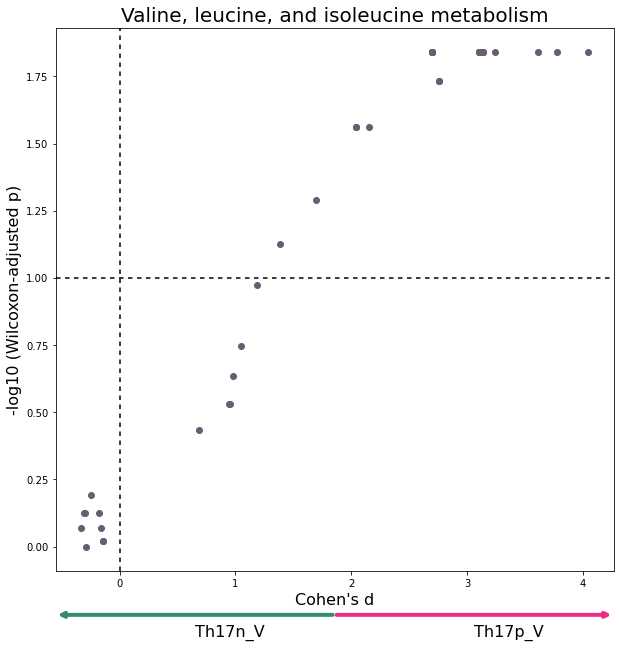

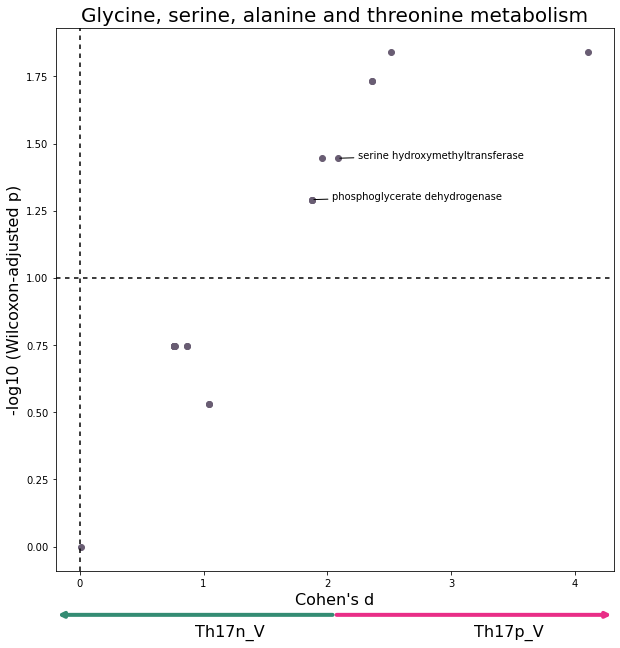

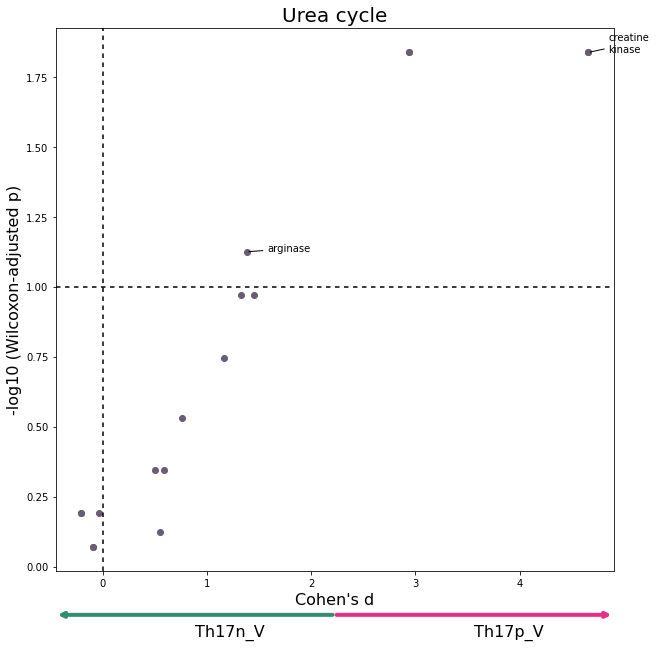

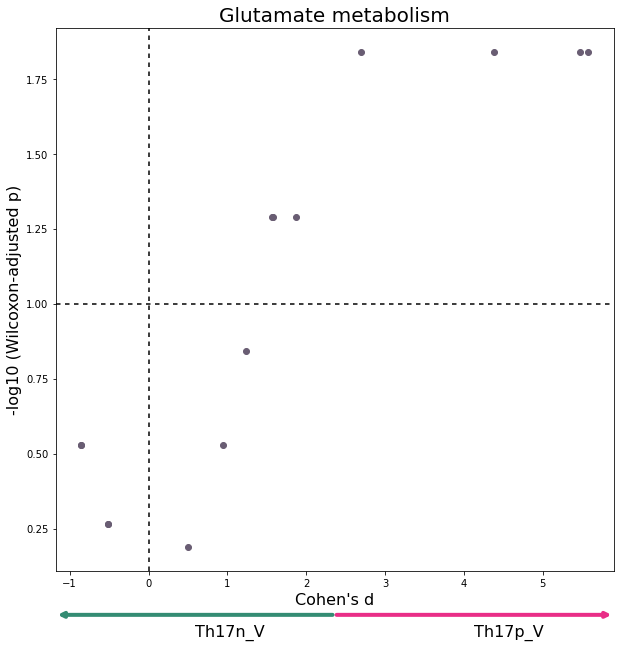

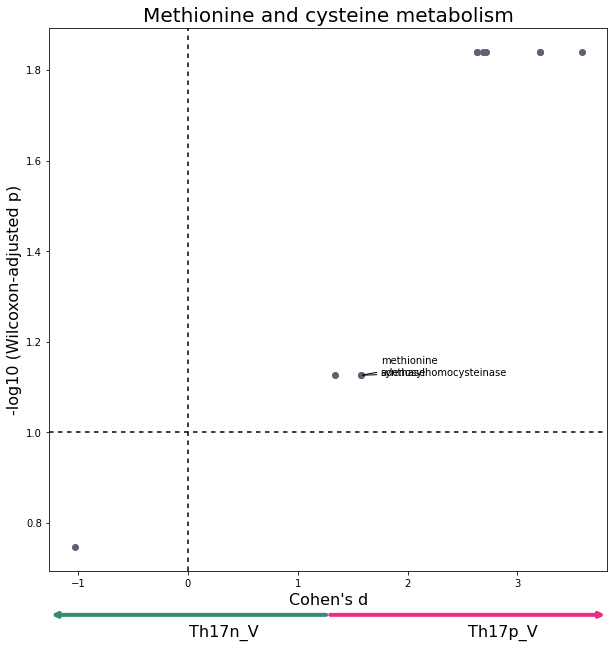

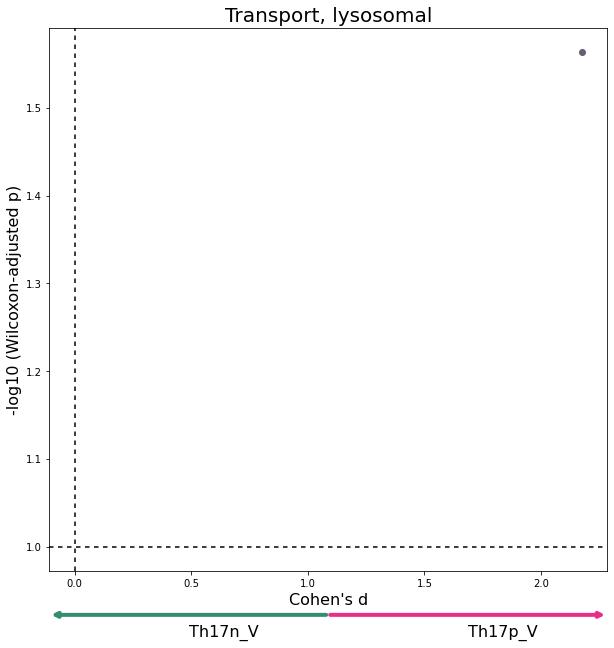

In [38]:
for item in filtered_data['subsystem'].value_counts().keys():
    data = W[W['subsystem'] == item]
    plot_differential_scores(data, title=item, c="#695D73")

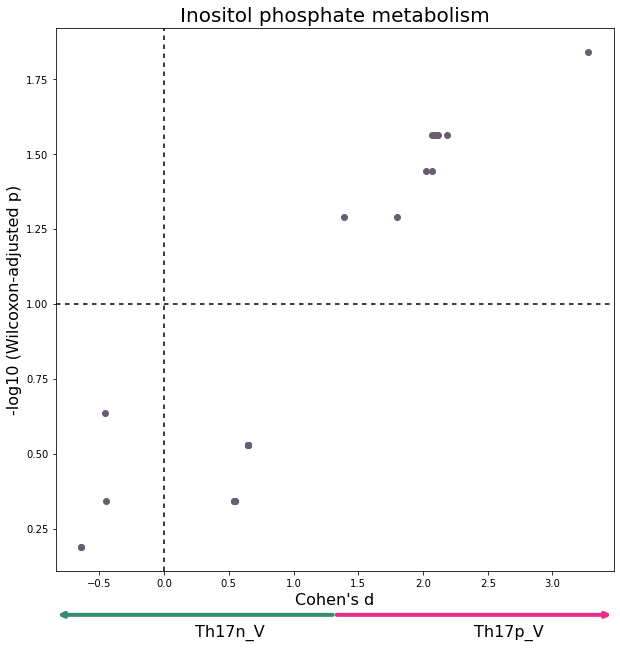

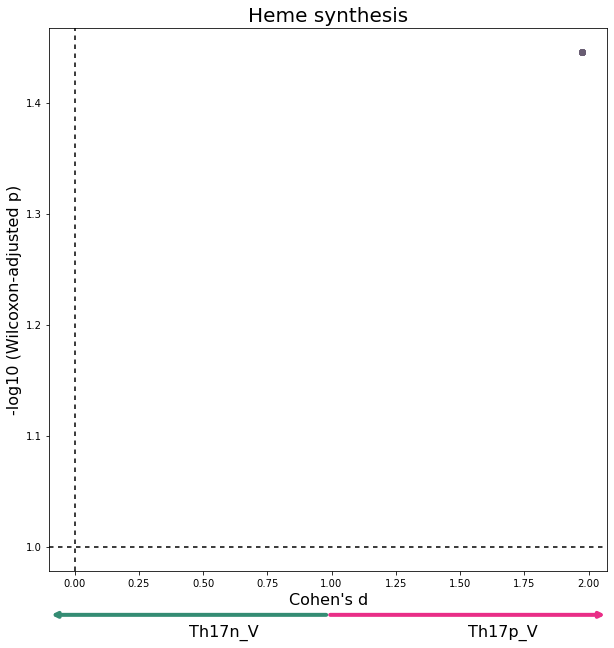

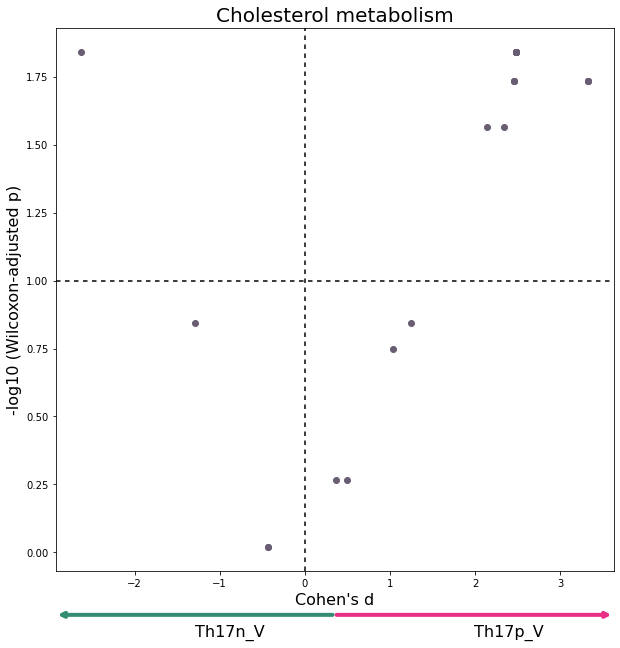

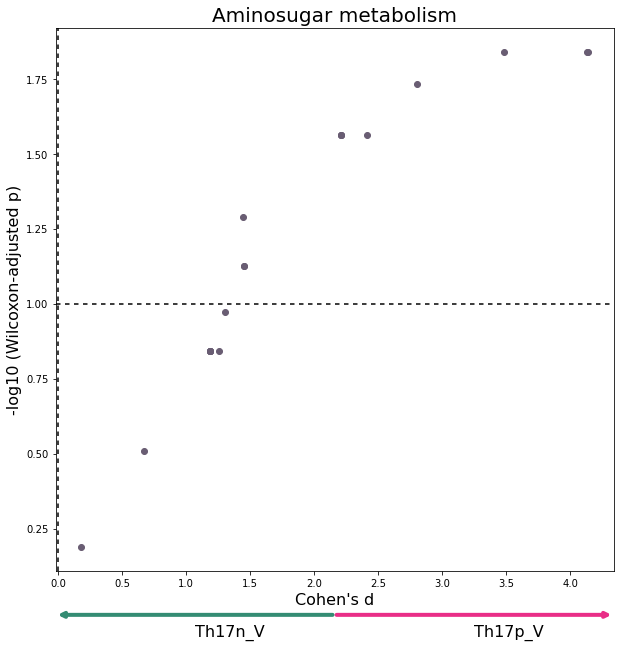

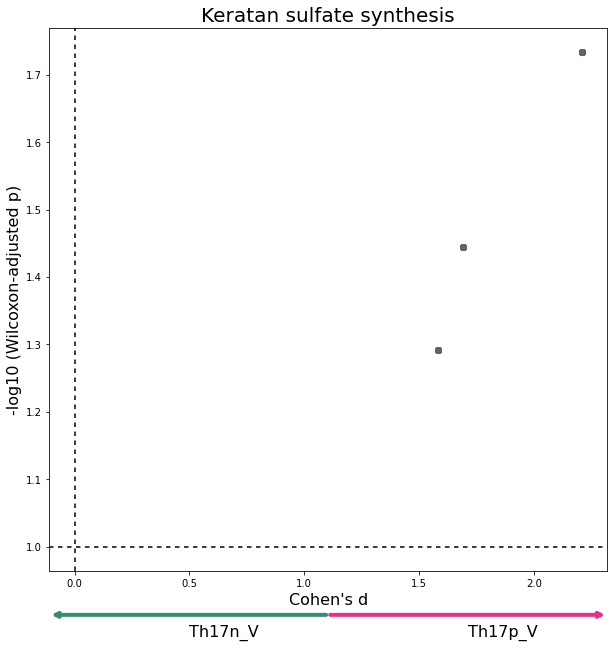

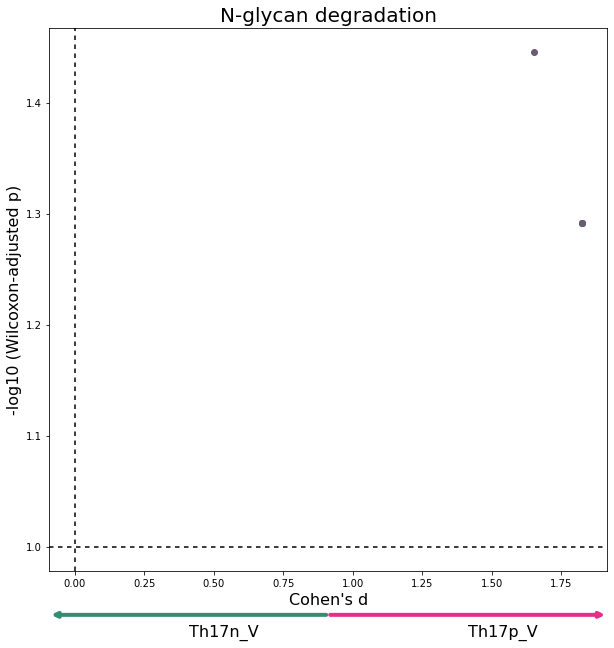

In [40]:
keys = ["Inositol phosphate metabolism", "Heme synthesis", "Cholesterol metabolism", 
        "Aminosugar metabolism", "Keratan sulfate synthesis", "N-glycan degradation"]
for item in keys:
    data = W[W['subsystem'] == item]
    plot_differential_scores(data, title=item, c="#695D73")

In [ ]:
filtered_data = pd.concat([W[W['subsystem'] == "Glycolysis/gluconeogenesis"],
             W[W['subsystem'] == "Citric acid cycle"],
            W[W['subsystem'].isin(amino_acid_metab)],
           W[W['subsystem'] == "Fatty acid oxidation"]])

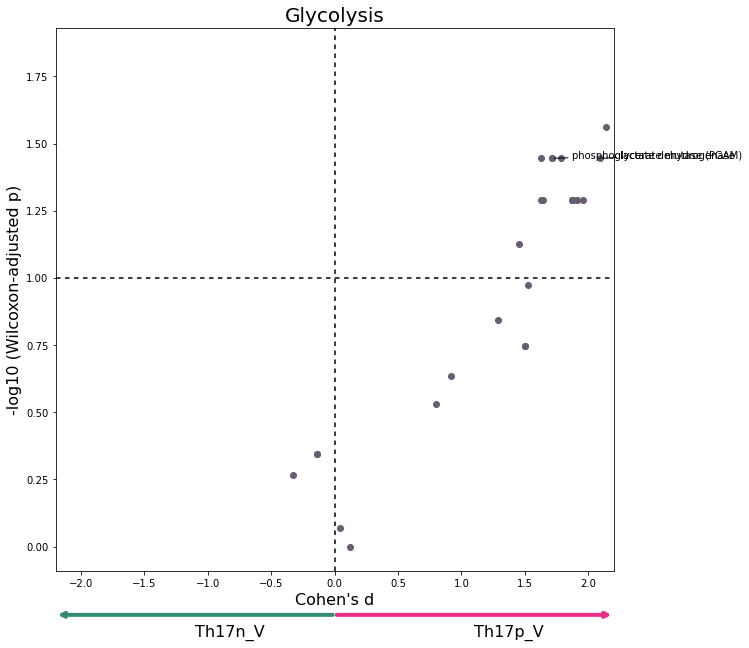

In [111]:
data = W[W['subsystem'] == "Glycolysis/gluconeogenesis"]
plot_differential_scores(data, title='Glycolysis', c="#695D73")

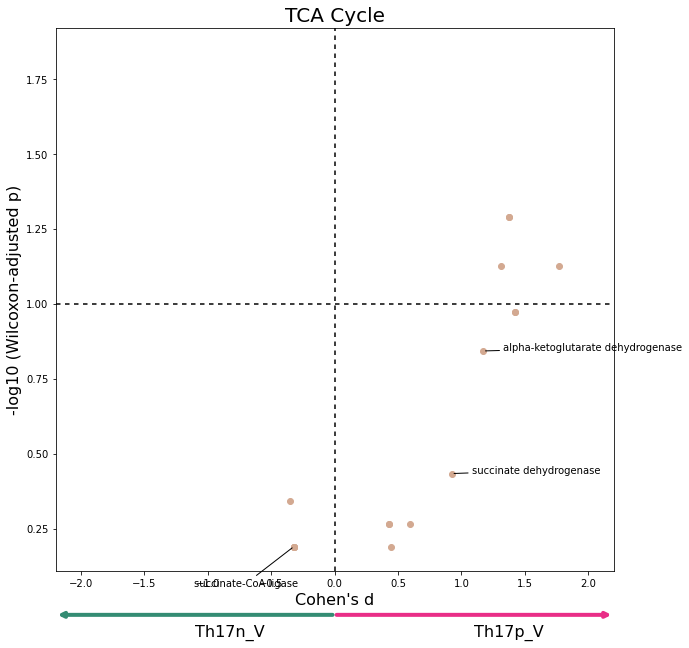

In [112]:
data = W[W['subsystem'] == "Citric acid cycle"]
plot_differential_scores(data, title="TCA Cycle", c="#D3A991")

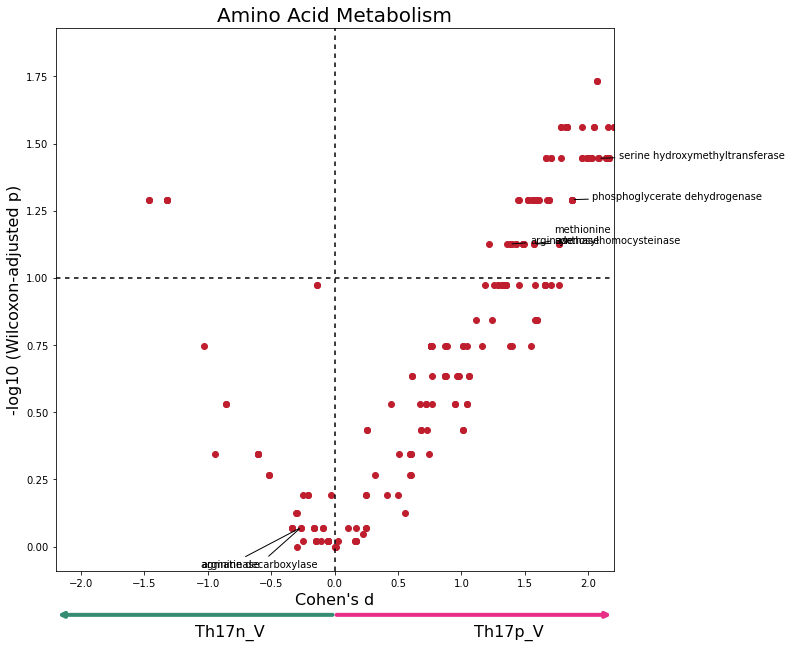

In [113]:
data = W[W['subsystem'].isin(amino_acid_metab)].copy()
data['adjusted_pval'] = data['adjusted_pval'].clip(1e-12)
plot_differential_scores(data, "Amino Acid Metabolism", c="#BF1E2E")

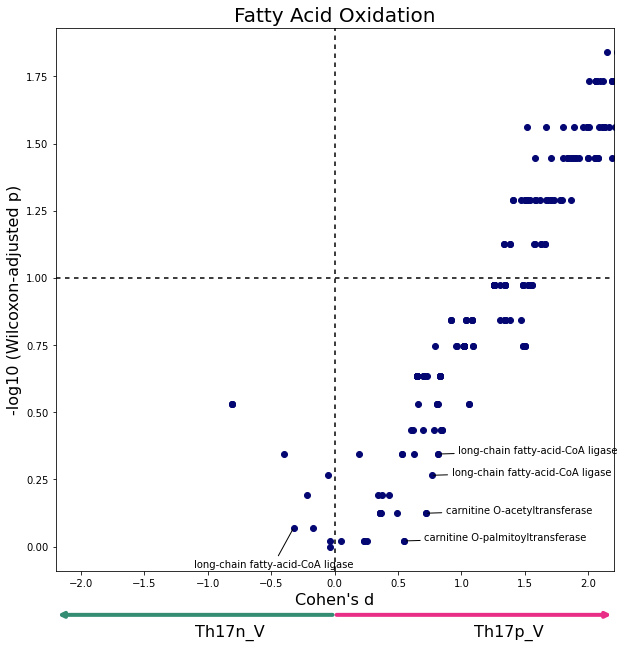

In [114]:
data = W[W['subsystem'] == "Fatty acid oxidation"]
plot_differential_scores(data, "Fatty Acid Oxidation", c="#040772")


In [115]:
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]

Text(0.5, 0, "Cohen's d")

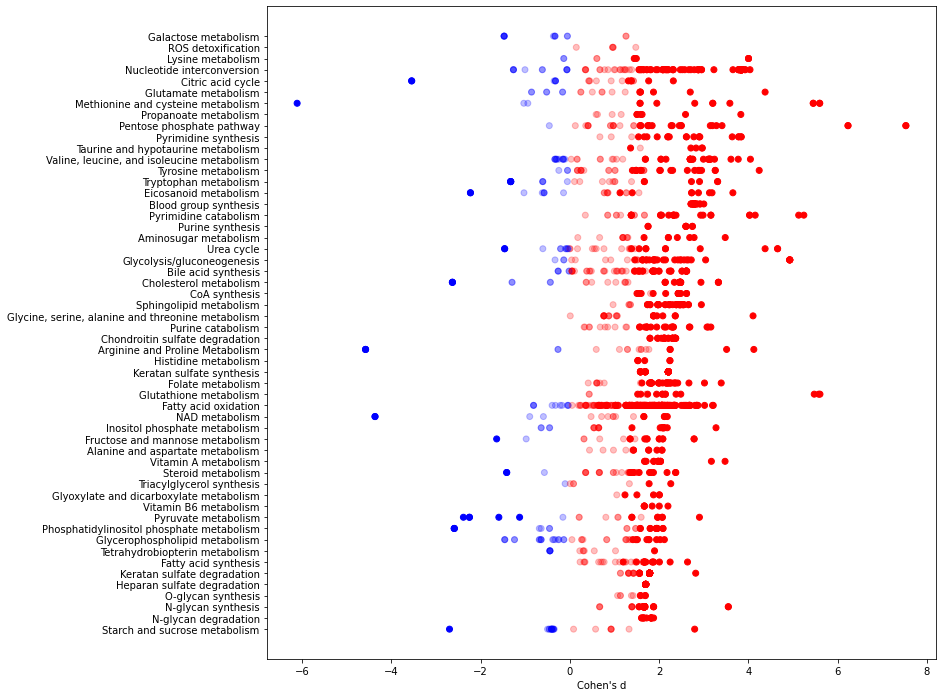

In [122]:
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d")
